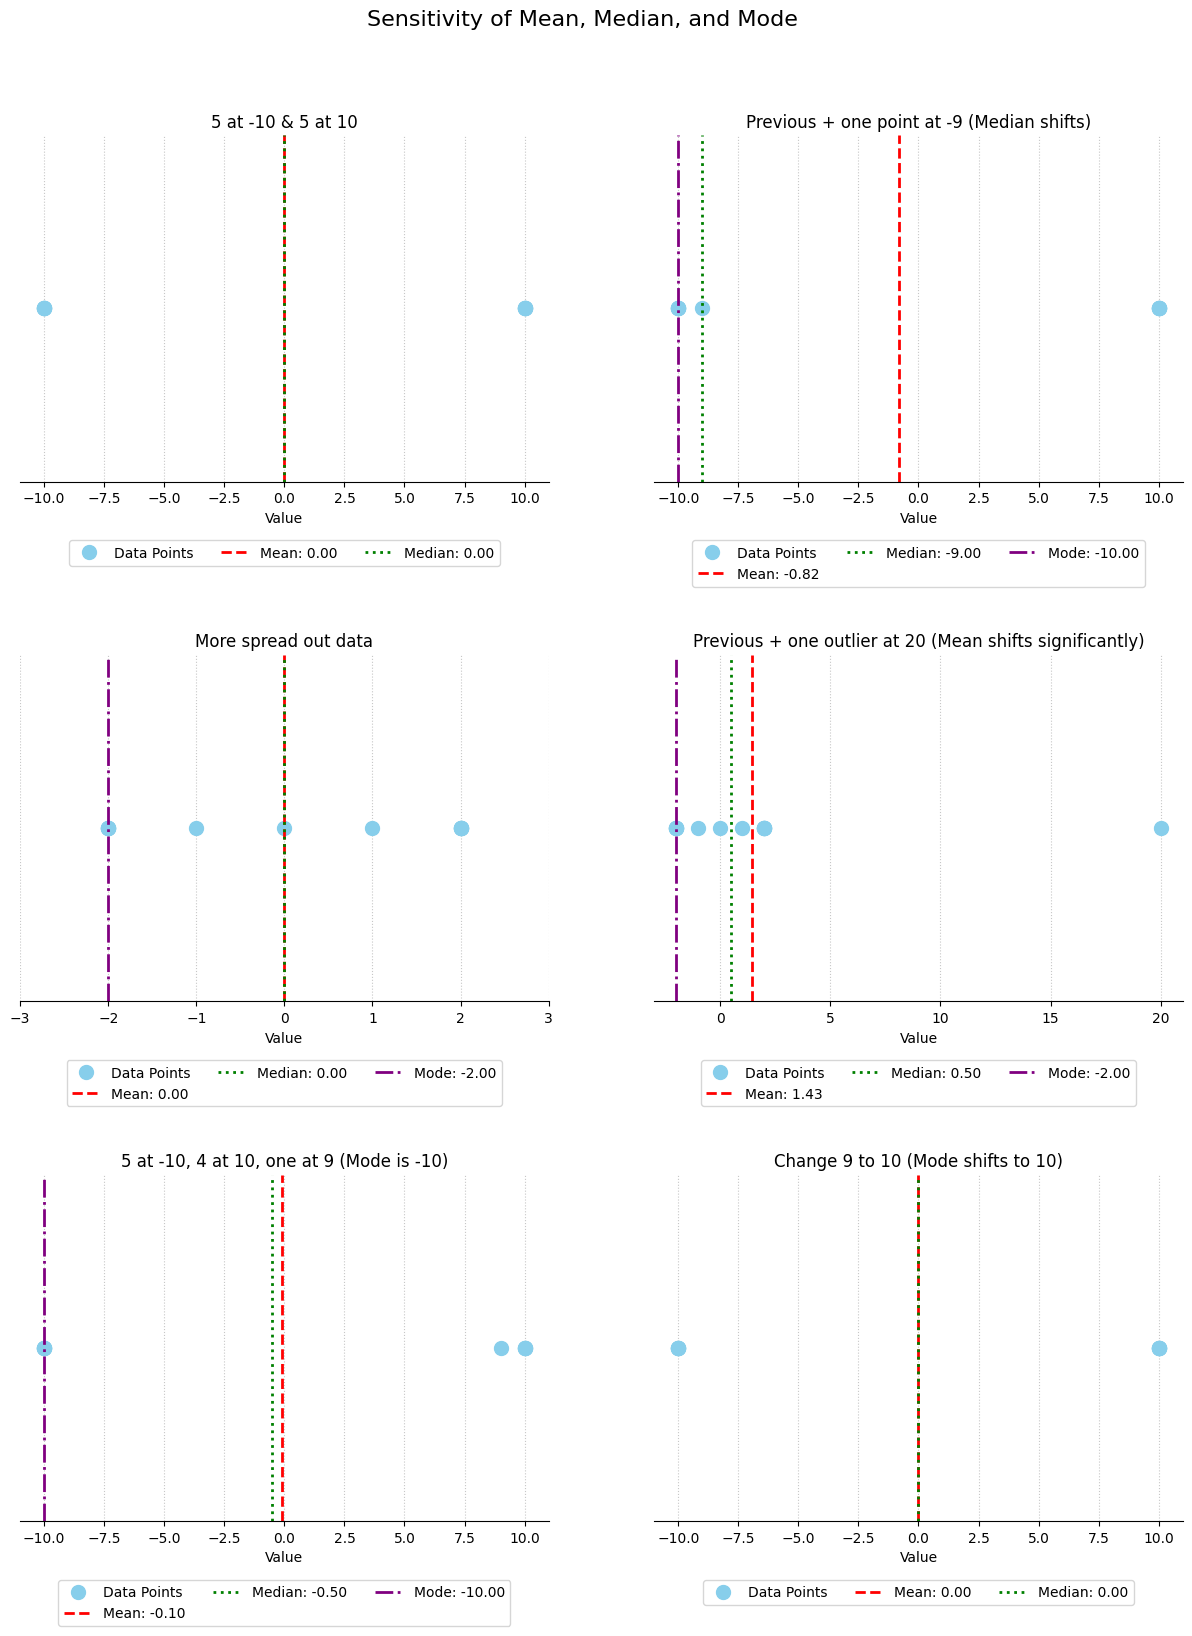

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_scales(ax, data, mean_val, median_val, mode_val, title):
    """Plots data points on a number line with mean, median, and mode."""
    y_offset = 0.1
    ax.plot(data, [y_offset] * len(data), 'o', markersize=10, color='skyblue', label='Data Points')
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Median: {median_val:.2f}')
    if mode_val is not None:
        ax.axvline(mode_val, color='purple', linestyle='-.', linewidth=2, label=f'Mode: {mode_val:.2f}')

    # Fulcrum for the mean
    ax.add_patch(patches.Polygon([[mean_val - 0.5, 0], [mean_val + 0.5, 0], [mean_val, -0.2]],
                                 closed=True, color='red', alpha=0.7))

    ax.set_yticks([])
    ax.set_xlabel('Value')
    ax.set_title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    ax.grid(True, axis='x', linestyle=':', alpha=0.7)
    # Set x-limits to ensure all points and annotations are visible
    all_values = np.concatenate([data, [mean_val, median_val]])
    if mode_val is not None:
        all_values = np.concatenate([all_values, [mode_val]])
    ax.set_xlim(min(all_values) - 1, max(all_values) + 1)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def calculate_mode(data_arr):
    vals, counts = np.unique(data_arr, return_counts=True)
    max_count = np.max(counts)
    modes = vals[counts == max_count]
    if len(modes) == len(vals): # All values unique
        return None
    return modes[0] # Return the first mode if multiple exist

# --- Scenario 1: Balanced data, then add a point near one end ---
k = 5
data1_base = np.concatenate([np.full(k, -10), np.full(k, 10)])
mean1_base = np.mean(data1_base)
median1_base = np.median(data1_base)
mode1_base = calculate_mode(data1_base) # Will be None or ambiguous if k=1

data1_add_near = np.append(data1_base, -9)
mean1_add_near = np.mean(data1_add_near)
median1_add_near = np.median(data1_add_near)
mode1_add_near = calculate_mode(data1_add_near)

# --- Scenario 2: Balanced data, then add an outlier ---
data2_base = np.concatenate([np.full(k, -2), np.full(k, 2), [-1, 0, 1]]) # More spread
mean2_base = np.mean(data2_base)
median2_base = np.median(data2_base)
mode2_base = calculate_mode(data2_base)

data2_add_outlier = np.append(data2_base, 20) # Add an outlier
mean2_add_outlier = np.mean(data2_add_outlier)
median2_add_outlier = np.median(data2_add_outlier)
mode2_add_outlier = calculate_mode(data2_add_outlier)


# --- Scenario 3: Mode sensitivity ---
# k at -10, k-1 at 10, one at 9
k_mode = 5
data3_base = np.concatenate([np.full(k_mode, -10), np.full(k_mode - 1, 10), [9]])
mean3_base = np.mean(data3_base)
median3_base = np.median(data3_base)
mode3_base = calculate_mode(data3_base)

# Change one point to shift the mode
data3_shift_mode = data3_base.copy()
data3_shift_mode[data3_shift_mode == 9] = 10 # Change the 9 to a 10
# or add another 10: data3_shift_mode = np.append(data3_base, 10)

mean3_shift_mode = np.mean(data3_shift_mode)
median3_shift_mode = np.median(data3_shift_mode)
mode3_shift_mode = calculate_mode(data3_shift_mode)


fig, axs = plt.subplots(3, 2, figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

plot_scales(axs[0, 0], data1_base, mean1_base, median1_base, mode1_base,
            f'{k} at -10 & {k} at 10')
plot_scales(axs[0, 1], data1_add_near, mean1_add_near, median1_add_near, mode1_add_near,
            f'Previous + one point at -9 (Median shifts)')

plot_scales(axs[1, 0], data2_base, mean2_base, median2_base, mode2_base,
            'More spread out data')
plot_scales(axs[1, 1], data2_add_outlier, mean2_add_outlier, median2_add_outlier, mode2_add_outlier,
            'Previous + one outlier at 20 (Mean shifts significantly)')

plot_scales(axs[2, 0], data3_base, mean3_base, median3_base, mode3_base,
            f'{k_mode} at -10, {k_mode-1} at 10, one at 9 (Mode is -10)')
plot_scales(axs[2, 1], data3_shift_mode, mean3_shift_mode, median3_shift_mode, mode3_shift_mode,
            f'Change 9 to 10 (Mode shifts to 10)')


plt.suptitle("Sensitivity of Mean, Median, and Mode", fontsize=16, y=0.95)
plt.show()